In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

* 標本は確率変数。確率的に変化する値としてみなされる。
* サイコロの目は確率変数。海で釣った魚の体長は確率変数。

In [2]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

* ランダムで魚を選ぶと、実行するたびに結果は変わる。

In [3]:
np.random.choice(fish_5, size=1, replace=False)

array([6])

In [4]:
np.random.choice(fish_5, size=1, replace=False)

array([5])

* replace=Trueとすることで、引いたくじを戻して再度引く、という選び方になる

In [5]:
np.random.choice(fish_5, size=5, replace=True)

array([4, 3, 5, 5, 5])

* seed値を固定すると、何度でも同じ結果が得られる

In [7]:
np.random.seed(1)
np.random.choice(fish_5, size=3, replace=True)

array([5, 6, 2])

In [8]:
np.random.seed(1)
np.random.choice(fish_5, size=3, replace=True)

array([5, 6, 2])

In [9]:
np.random.seed(2)
np.random.choice(fish_5, size=3, replace=False)

array([4, 6, 3])

In [11]:
np.random.seed(2)
np.random.choice(fish_5, size=3, replace=False)

array([4, 6, 3])

### 標本平均
* seed値を固定した標本に対して、標本平均を求める

In [12]:
np.random.seed(1)
np.mean(
    np.random.choice(fish_5, size=3, replace=False)
)

4.333333333333333

### 復元抽出・非復元抽出
* 復元抽出とは、くじを元に戻してもう一度引くやりかた。パチスロやガチャ。
* 非復元抽出とは、一度引いたくじを戻さずに引くやり方。宝くじ。
* replace = True / False

In [33]:
fish_100000 = pd.read_csv('data/3-4-1-fish_length_100000.csv')['length']
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [34]:
len(fish_100000)

100000

### 母集団分布

In [35]:
np.mean(fish_100000)

4.000000000000001

In [36]:
np.std(fish_100000)

0.8

In [37]:
np.var(fish_100000)

0.64

<AxesSubplot:xlabel='length', ylabel='Count'>

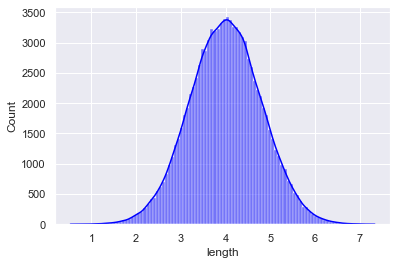

In [40]:
sns.histplot(fish_100000, kde=True, color='blue', bins=100)

* 上の図を見る限り、<b>平均4.0, 分散0.64の正規分布として仮定</b>出来そうだ。
* このように仮定を置くことで、母集団の全数調査をすることなく、母集団の特性について議論しやすくなる。

### 平均4, 分散0.64の正規分布の確率密度を図示してみる

<AxesSubplot:xlabel='length', ylabel='Count'>

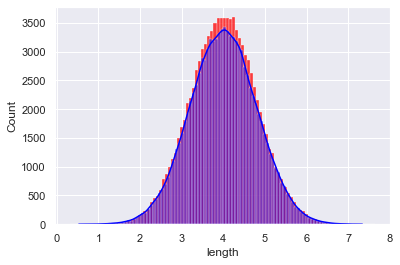

In [46]:
# 同じく100,000データの正規分布を作成
tmp = np.random.normal(loc=4.0, scale=0.8, size=100000)

# ヒストグラムを重ねて作成。このときbin数を同じにしないとCountがずれる
sns.histplot(tmp, bins=100, color='red')
sns.histplot(fish_10000, kde=True, color='blue', bins=100)

* 正規分布の確率密度関数を描きたい時（面積を1にしたい時）は、numpy単体では難しいので、scipy.statのnorm.pdfを用いる。

In [64]:
x = np.arange(1, 7.1, 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [90]:
tmp = stats.norm.pdf(x=x, loc=4, scale=0.8)
tmp

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

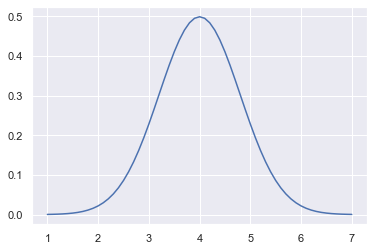

In [91]:
plt.plot(x, tmp)

### 正規分布に従う乱数を発生させる関数
* scipy.stats.norm.rvs()
* locに平均、scaleに標準偏差、sizeに取得したいサンプル数

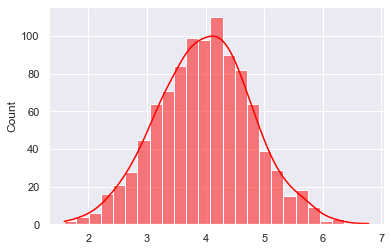

In [105]:
sample_norm = stats.norm.rvs(loc=4, scale=0.8, size=1000)
sns.histplot(data=sample_norm, kde=True, color='red')
plt.savefig('norm0.png')

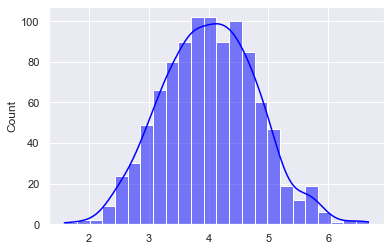

In [108]:
import random

norm1 = [random.normalvariate(4, 0.8) for _ in range(1000)]

sns.histplot(data=norm1, kde=True, color='blue')
plt.savefig('norm1.png')

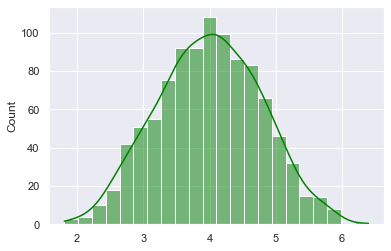

In [107]:
norm2 = np.random.normal(loc=4.0, scale=0.8, size=1000)

sns.histplot(data=norm2, kde=True, color='green')
plt.savefig('norm2.png')

In [109]:
norm1[:6]

[3.143, 5.091, 2.851, 4.403, 4.195, 5.239]

In [110]:
norm2[:6]

array([4.016, 5.096, 4.532, 3.389, 3.931, 2.48 ])

In [111]:
sample_norm[:6]

array([3.846, 1.679, 2.534, 3.961, 4.94 , 3.895])